# Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- `Which variables are significant in predicting the demand for shared bikes.`
- `How well those variables describe the bike demands`

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing necessary Libraries for Visualization and model building

In [228]:
# Importing important Libaries for vizualizaton and linear model building from stats models and Scikit learn

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 

# Importing linear model building library

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import joblib

# Ignoring warnings

warnings.filterwarnings("ignore")

#### Reading input Data File

In [229]:
# importing data from day csv file

# file path D:\Data Science\Machine Learning model\Linear Regression\Boom_Bike_Linear_regression_Assignment_Sagnik\day.csv

boom_bike_dataframe=pd.read_csv(r"D:\Data Science\Machine Learning model\Linear Regression\Boom_Bike_Linear_regression_Assignment_Sagnik\day.csv")

# checking first five rows of the dataset

boom_bike_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Checking the Shape, Summary and datatype information of Dataset

In [230]:
# Checking the shape (rows and coloumns)

boom_bike_dataframe.shape

(730, 16)

- DataFrame is having `730` rows and `16` columns

In [231]:
# Checking summary of all numerical coloumns

boom_bike_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [232]:
# checking info for the dataframe to check the null , not null values and datatypes

boom_bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Null Value Analysis

In [233]:
# checking the number of null values in coloumns

boom_bike_dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- We can see that, there is **`no Null values/ missing values`** in the input dataset

### Drop unnecessary variables

- **instant** - It is an index variale, so it does not make any siginficance for model, hence, we will drop it
- **dteday** - Dataset has year ,month and weekday as separate columns, we will drop dteday
- **casual + registered = cnt** - As cnt column holds the same information, and also these values will not be available at the time of making prediction as it's a kind of target variable.So we will consider to drop **casual** and **registered** and treat **cnt** as target variable.

In [234]:
# Drop unnecessary variables
# instant - row index variale, so it doest make any sence for model, so we will drop it
# dteday - dataset has year ,month and weekday as separate columns, we will drop dteday
# casual + registered = cnt, we will drop casual,registered and will treat "cnt" as the target variable

boom_bike_dataframe.drop(columns=['instant','dteday','casual','registered'],inplace=True)

# Checking rows in the dataframe after droping columns

boom_bike_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [235]:
# checking the data types

boom_bike_dataframe.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Renaming columns for better understanding

In [236]:
# Renaming the columns for better understanding the variables

boom_bike_dataframe.rename(columns=({'atemp':'feeling temperature','temp':'temperature','hum':'humidity','mnth':'month','yr':'year'}),inplace=True)

# Checking the dataframe after renaming

boom_bike_dataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Numerical/Continuous variable to Categorical variable Conversion:

In [237]:
# Created custom function for converting some numerical columns to categorical variable uding map function

def con_num_cate(col,val_dict):
    boom_bike_dataframe[col]=boom_bike_dataframe[col].map(val_dict)


In [238]:
# Calling the custom function for converting below (season,month,weekday,weathersit) numerical variable to categorical variable

con_num_cate('season',{1:'spring',2:'summer',3:'fall',4:'winter'})
con_num_cate('month',{1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
con_num_cate('weekday',{0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
con_num_cate('weathersit',{1:'Clear',2:'Mist and Cloudy',3:'Light Snow',4:'HeavyRain + IcePallets + Thunderstorm + Mist'})

# Checking dataset after conversion

boom_bike_dataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Checking the datatypes after numerical to categorical conversion

In [239]:
# Checking the datatypes after categorical variable conversion

boom_bike_dataframe.dtypes

season                  object
year                     int64
month                   object
holiday                  int64
weekday                 object
workingday               int64
weathersit              object
temperature            float64
feeling temperature    float64
humidity               float64
windspeed              float64
cnt                      int64
dtype: object

## Data Visualization

- Perform `EDA` to understand relationship of dependent variable ('cnt') with other independent variables (X).
- Check the `correlation` between the variables

### Exploratory Data Analysis (EDA)

#### Bivariate Analysis - Numerical vs. Numerical Variable

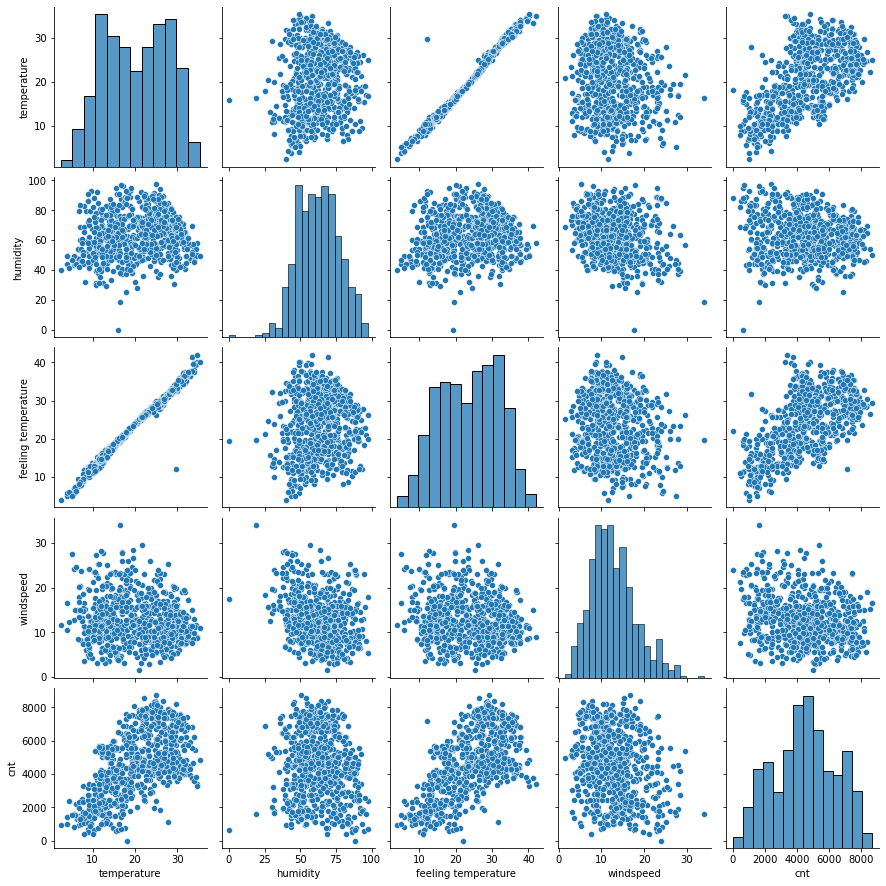

In [240]:
# Vizualising numerical vs numerical bivariate relationship

# Ploting pairplot for numerical variables

sns.pairplot(boom_bike_dataframe, vars=['temperature','humidity','feeling temperature','windspeed','cnt'])

# Displaying the plots

plt.show()


#### Inference: 

- We can see that the predictor variable **`Temperature`** has a **`good positive linear relationship with the count of total rental bikes (Dependent variable 'cnt')`**.It has a good correlation with the `cnt`.


- We can see that the **`Feeling Temperature`** predictor variable  has a **` good positive linear relationship with the count of total rental bikes (Dependent variable 'cnt')`**.It has also a good correlation with the `cnt`.



- **`Humidity and Windspeed do not show as such good linear relation`** with the count of total rental bikes (Dependent variable 'cnt')

In [241]:
# creating custom function for bivariate analysis between categorical vs numerical ('cnt') columns using boxplot.

def box_plot_cat_num(col1,col2,dataframe):

  # Ploting the boxplot

    sns.boxplot(data=dataframe,x=col1,y=col2)

  # Formating the x and ylabel

    plt.ylabel('count',color='red',labelpad=15,fontsize=25)
    plt.xlabel(col1,color='red',labelpad=15,fontsize=25)
    
    # Setting x-ticks font size
    
    plt.xticks(fontsize = 20)
    
    # Setting y-ticks font size
    
    plt.yticks(fontsize = 20)

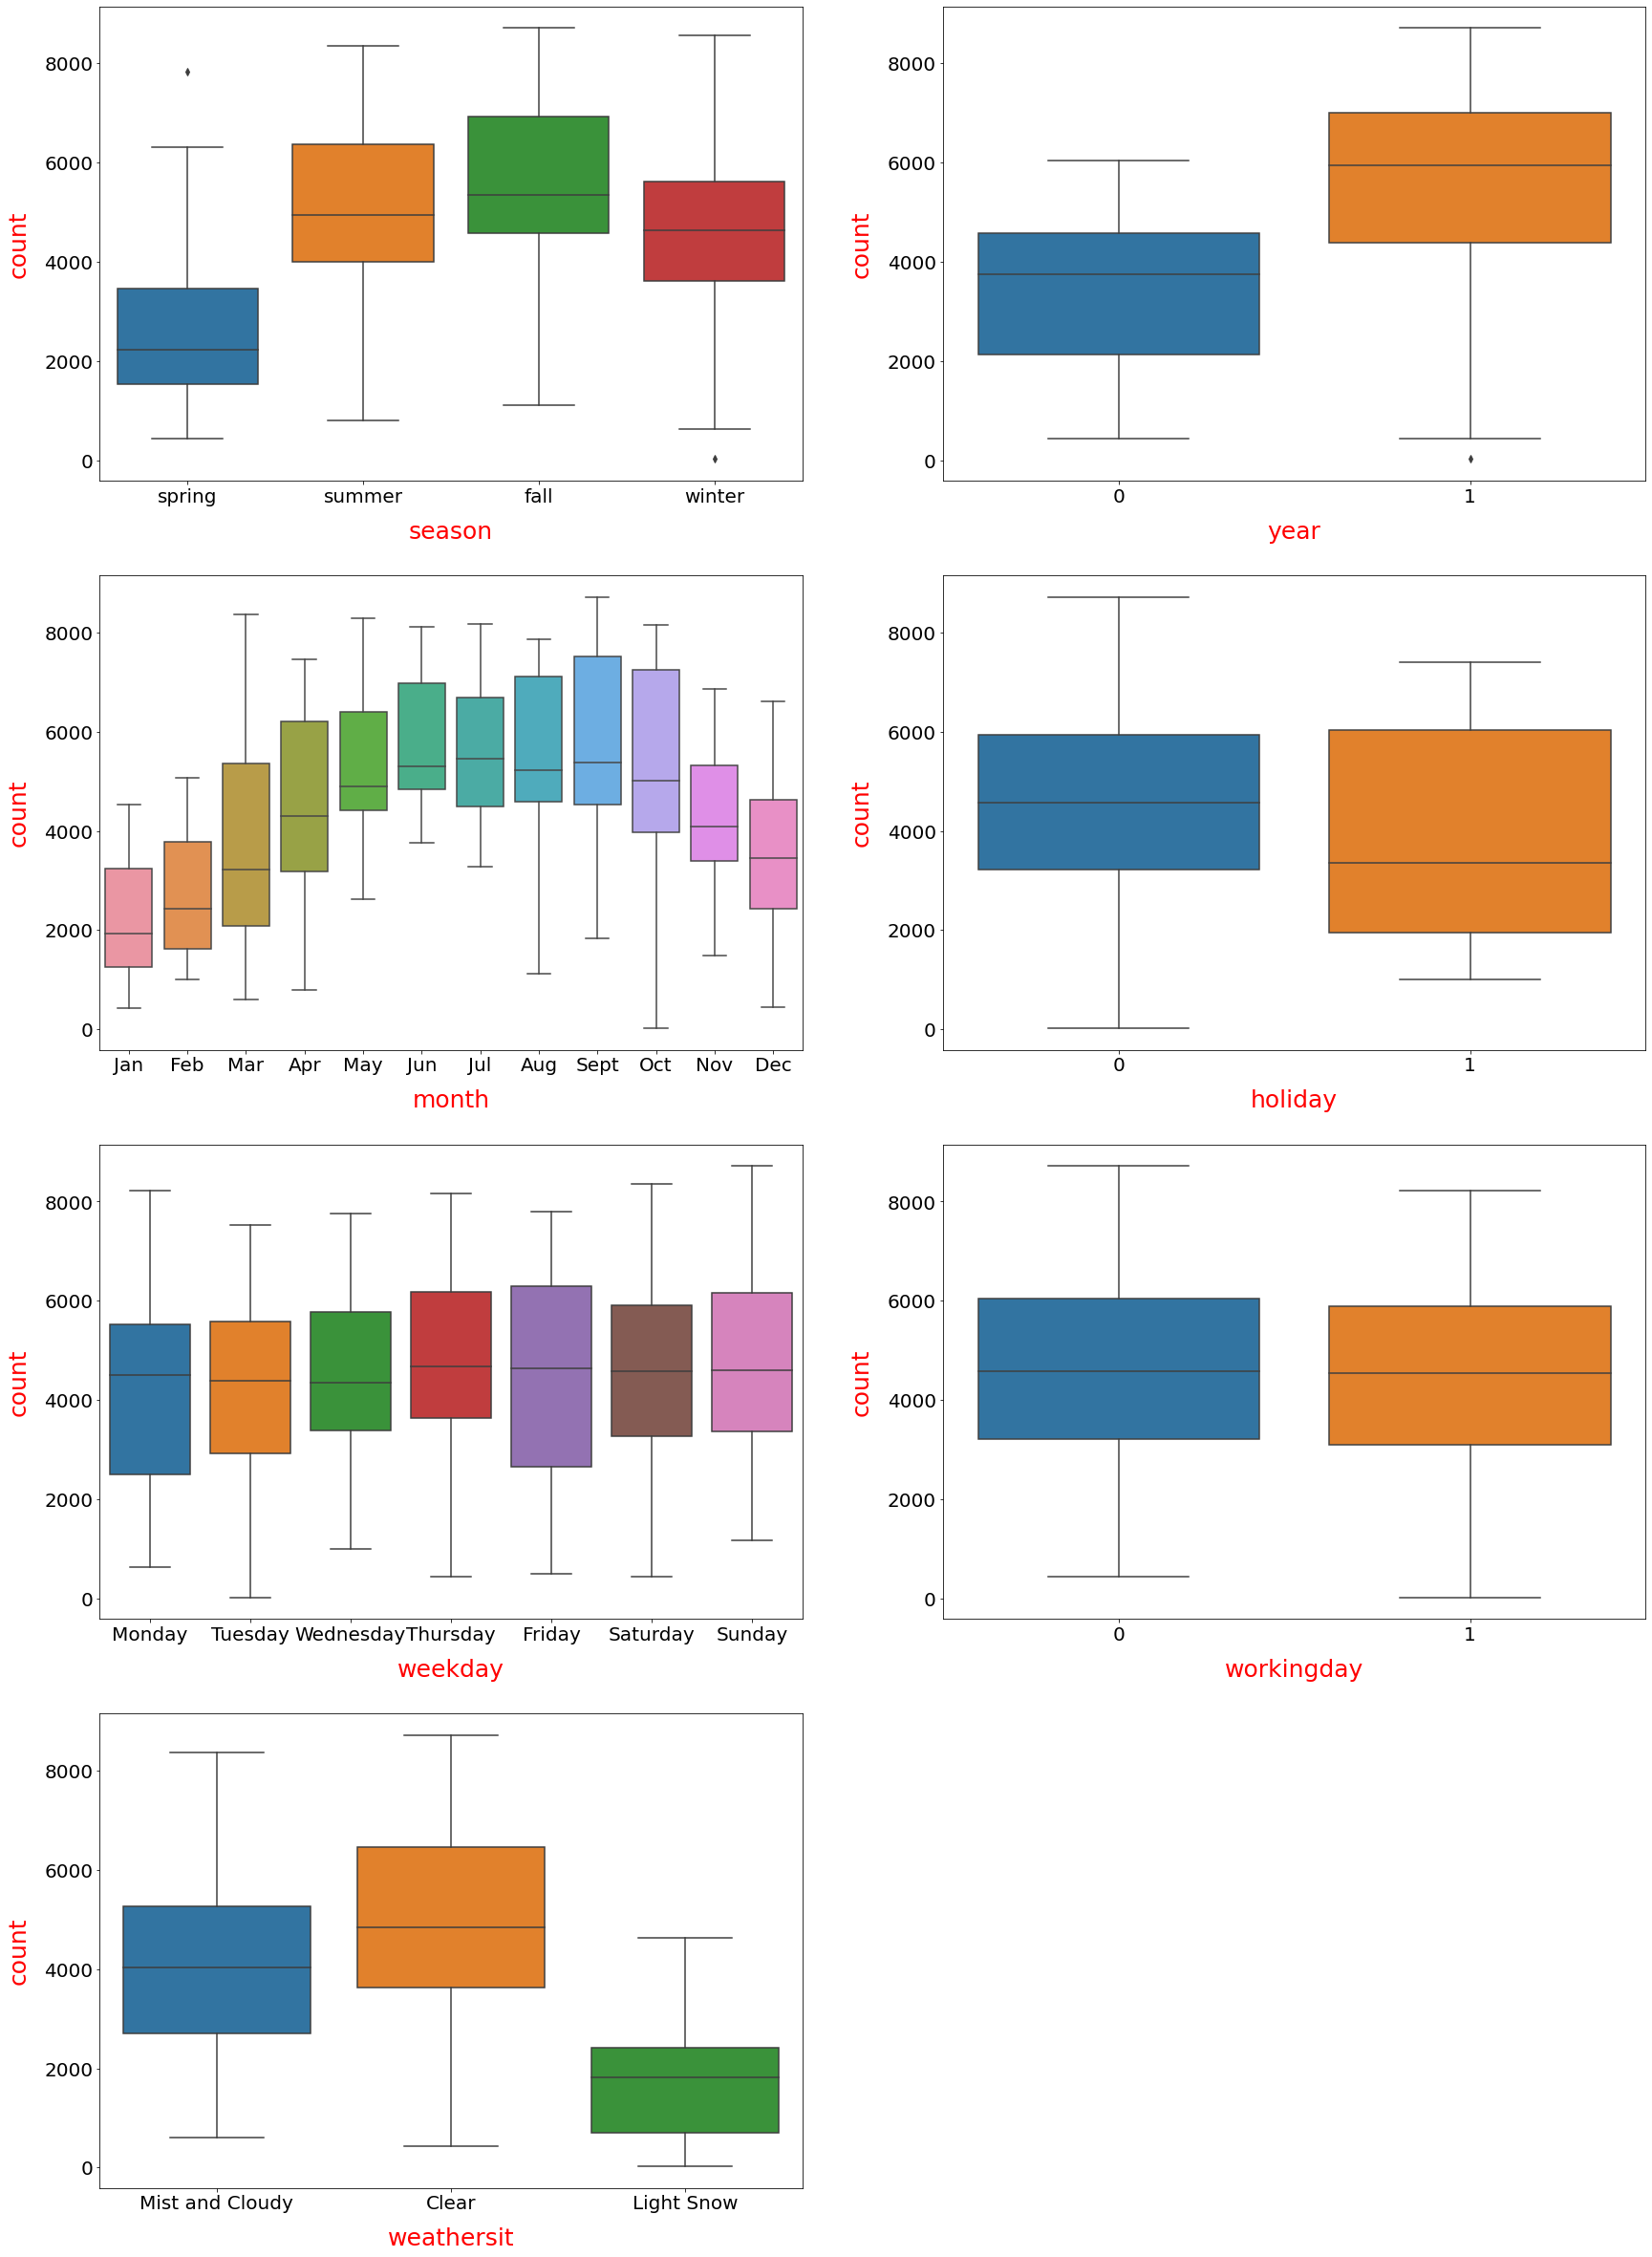

In [242]:
# Calling the custom function box_plot_cat_num for bivariate analysis

# Setting the figure size 

plt.figure(figsize=(29,42))

# Doing the subplots and calling the custom function for bivariate analysis, ploting the boxplot for different categorical columns against cnt column

plt.subplot(4,2,1)
box_plot_cat_num('season','cnt',boom_bike_dataframe)
plt.subplot(4,2,2)
box_plot_cat_num('year','cnt',boom_bike_dataframe)
plt.subplot(4,2,3)
box_plot_cat_num('month','cnt',boom_bike_dataframe)
plt.subplot(4,2,4)
box_plot_cat_num('holiday','cnt',boom_bike_dataframe)
plt.subplot(4,2,5)
box_plot_cat_num('weekday','cnt',boom_bike_dataframe)
plt.subplot(4,2,6)
box_plot_cat_num('workingday','cnt',boom_bike_dataframe)
plt.subplot(4,2,7)
box_plot_cat_num('weathersit','cnt',boom_bike_dataframe)

# Displaying the subplots

plt.show()

### Inference:

  **`Season :`**

- We can see from the above box plot, `count of total rental bikes (Dependent variable 'cnt') is high in season "Fall"` (Predictor variable) having 75% of the box lies in around 7000 for the season "Fall"`.Then followed by season `"Summer"` then in `"winter"`.


- Whereas season `"spring" has much less bike rental counts`.


- Also we can see there is `an outlier in season "spring" and in "winter"` with respect to count of total rental bikes (Dependent variable 'cnt')



**`Year :`**

- We can see from the above box plot, count of total rental bikes (Dependent variable 'cnt') `is high in the year (Predictor variable) 2019 than 2018`.


- Also we can also see there is `an outlier in year 2019` with respect to count of total rental bikes (Dependent variable 'cnt').



**`Month :`**


- We can see from the above box plot, count of total rental bikes (Dependent variable 'cnt') `is high is the month (Predictor variable) of "September"` followed by "october" then in "August".


- Wheareas `month "January" has much less bike rental counts`.



**`Holiday :`**


- We can see from the above box plot, count of total rental bikes (Dependent variable 'cnt') `is high when it is not a holiday (Predictor variable) as the median lies more than 4000 and upper fence of the box is more than 8000`.


- Whereas the `median and the upper fence value for the count of total rental bikes (Dependent variable 'cnt') is less when there is a holiday`.



**`Days of the week :`**


- We can see from the above box plot, count of total rental bikes (Dependent variable 'cnt') `is high in "Friday" followed by "Thursday" in weekdays (Predictor variable) and in weekend , it is high in "Sunday"`.


- Whereas the demand of the rental bikes (Dependent variable 'cnt') is `less in other days of the week`.



**`Workingdays :`**


- We can see from the above box plot, count of total rental bikes (Dependent variable 'cnt') `is high in non workingdays (Predictor variable) (weekend or in holidays) having 75% of the box lies in around 6000 and upper fence is more than 8000`.


- Whereas the demand of the `rental bikes (Dependent variable 'cnt') is less in workingdays`.


**`Weather Situation :`**


- We can see from the above box plot, count of total rental bikes (Dependent variable 'cnt') `is high when the sky is clear (Predictor variable), followed by Mist cloudy`.


- Whereas the demand of the rental bikes (Dependent variable 'cnt') is `much less when there is Light snow (Predictor variable)`. 

#### Bivariate Analysis - Categorical vs. Numerical Variable with respect to years 2018,2019

In [243]:
# creating custom function for Bivariate analysis between categorical vs numerical ('cnt') columns using barplot for two different years (2018,2019)

def bar_plot_cat_num(col1,col2,dataframe,hue):

  # Setting the figure size 

    plt.figure(figsize=(8,6))

  # Ploting the bar plot

    ax=sns.barplot(data=dataframe,x=col1,y=col2,hue=hue)

  # Formating the plots,setting the xticks,xlabel,ylabel etc.

    plt.ylabel('count',color='red',labelpad=12,fontsize=15)
    plt.xlabel(col1,color='red',labelpad=10,fontsize=15)
    
    if col1=='year':
        plt.xticks([0,1],['2018','2019'])
    if col1=='holiday':
        plt.xticks([0,1],['No Holiday','Holiday'])
    if col1=='workingday':
        plt.xticks([0,1],['weekend/holiday','workingday'])
    plt.title('Plot for '+col1+' vs '+col2,color='red',pad=12,fontsize=15)

  # Displaying the plot

    plt.show()

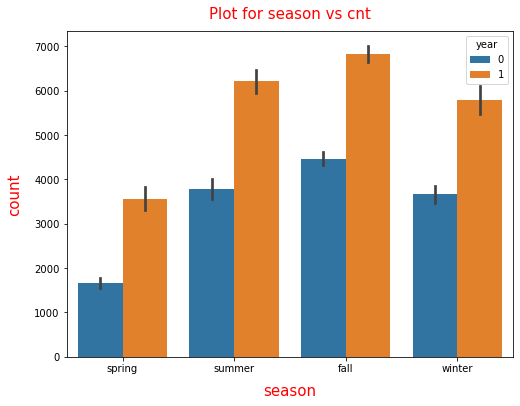

In [244]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs season for two different years

bar_plot_cat_num('season','cnt',boom_bike_dataframe,'year')

#### Inference:

- From the above bar plot we can see that the count of total rental bikes (Dependent variable 'cnt') is `high in season "Fall" (Predictor variable) and also within the year of 2019.Followed by season summer then in winter`.


- We can see that the count of total rental bikes (Dependent variable 'cnt') is also `high in season "Fall" (Predictor variable) for the year of 2018`.Also followed by season summer then in winter.

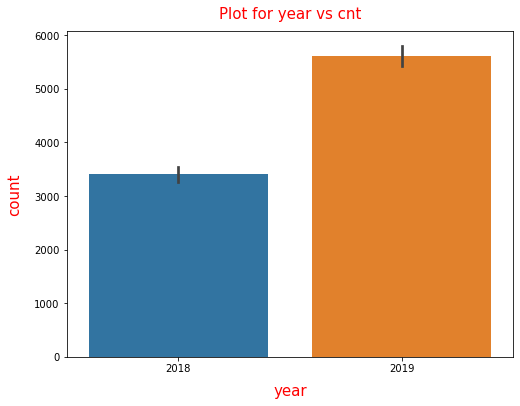

In [245]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs year

bar_plot_cat_num('year','cnt',boom_bike_dataframe,None)

#### Inference:

- From the above bar plot we can see that the count of total rental bikes (Dependent variable 'cnt') is `high in the year (Predictor variable) 2019 than 2018`.


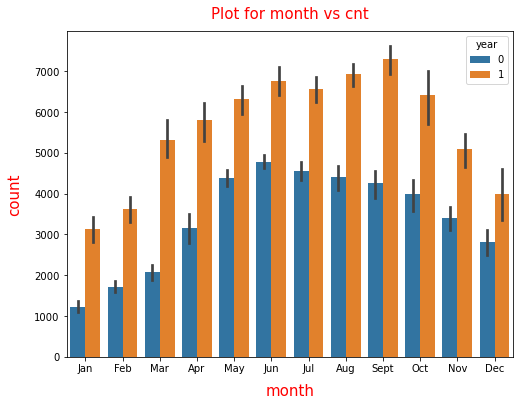

In [246]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs month for two different years

bar_plot_cat_num('month','cnt',boom_bike_dataframe,'year')

#### Inference:

- If we see both years 2018 and 2019 seperately in the bar plot , then we can say the count of total rental bikes (Dependent variable 'cnt') `is high in month of "September" in the year 2019`.


- The demand of rental bikes (Dependent variable 'cnt') is `high in month of "June" in the year 2018`.

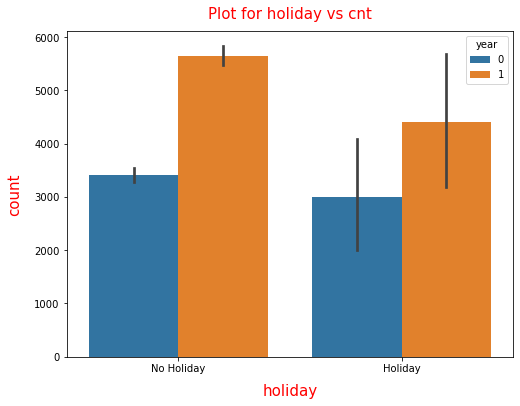

In [247]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs holiday for two different years

bar_plot_cat_num('holiday','cnt',boom_bike_dataframe,'year')

#### Inference:

- From the above bar plot we can see that the count of total rental bikes (Dependent variable 'cnt') is `high when there is not holiday for both the years 2018 and 2019`.

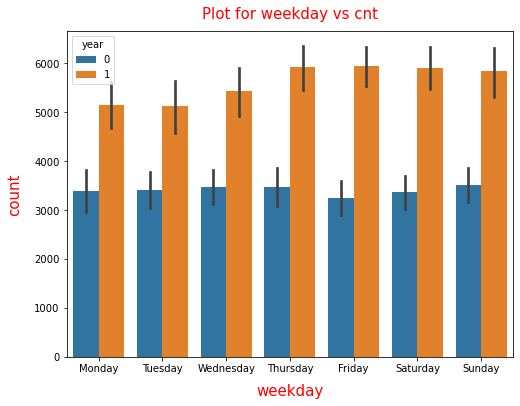

In [248]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs weekday for two different years

bar_plot_cat_num('weekday','cnt',boom_bike_dataframe,'year')

#### Inference:

- From the above bar plot we can see that the demand of rental bikes (Dependent variable 'cnt') is `high in Friday , Thursday and in Saturday respectively in the year 2019`.


- Wheareas the demand of rental bikes (Dependent variable 'cnt') is `high in Wednesday,Thursday, tuesday and in Monday respectivelyin the year 2018`.

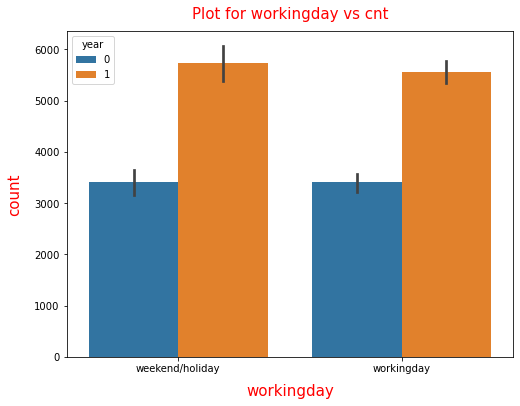

In [249]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs workingday for two different years

bar_plot_cat_num('workingday','cnt',boom_bike_dataframe,'year')

#### Inference:

- From the above bar plot we can see that the count of total rental bikes (Dependent variable 'cnt') is `high when there is weekend or holiday for both the years 2018 and 2019`.


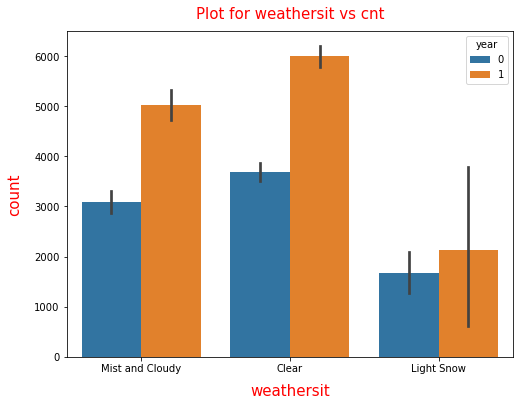

In [250]:
# Calling the custom function bar_plot_cat_num for Bivariate analysis for count vs weathersit for two different years

bar_plot_cat_num('weathersit','cnt',boom_bike_dataframe,'year')

#### Inference:

- From the above bar plot we can see that the demand of rental bikes (Dependent variable 'cnt') is `high when sky is clear for both the years 2018 and in 2019`.



- From the above bar plot we can see that the demand of rental bikes (Dependent variable 'cnt') is `much less when ther is light snow for both the years 2018 and in 2019`.

### Checking the co-relations between numerical/continuous variables

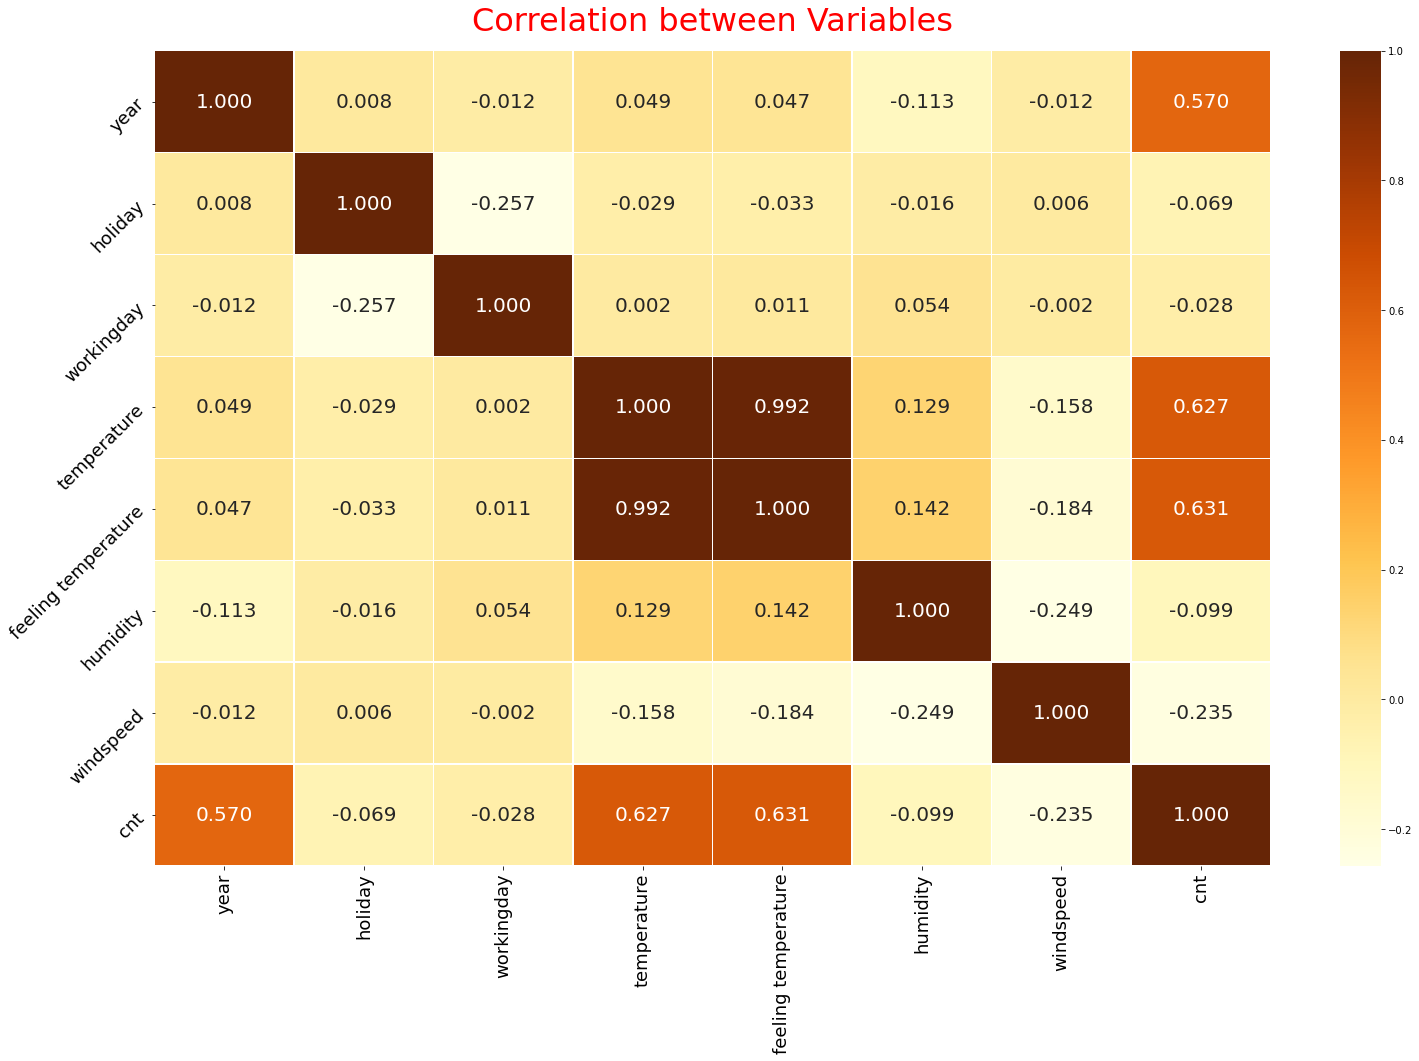

In [251]:
# Checking the correlations between continuous variable in the dataframe using heatmap

# Setting the figure size

plt.figure(figsize=(25, 15))

# Ploting the heatmap from seaborn library

sns.heatmap(boom_bike_dataframe.corr(), cmap='YlOrBr', annot = True,linecolor='white',fmt='.3f',linewidths=0.5,annot_kws={"fontsize":20})

# Setting the title of the plot

plt.title("Correlation between Variables", fontsize=32, color='red',pad=20)

# Setting x-ticks font size
    
plt.xticks(fontsize = 18,rotation=90)
    
# Setting y-ticks font size
    
plt.yticks(fontsize = 18,rotation=45)

# Displaying the plot

plt.show()

#### Inference:

- We can see that the predictor variable `Temperature` has a **`high positive linear relationship with the count of total rental bikes (Dependent variable 'cnt')`**.It has a good correlation with the count that is `0.627`.



- We can see that the `Feeling Temperature` (predictor variable) has a **`good positive linear relationship with the count of total rental bikes (Dependent variable 'cnt')`**.It has also a good correlation with the count that is ` 0.631`.



- **`Humidity and Windspeed do not show as such good correlation with the count of total rental bikes (Dependent variable 'cnt')`**, having correlation value of `-0.099 for Humidity and -0.235 for windspeed`. 

## Linearity Assumption :

- As is visible from the `pairplot and from the heatmap`, we can see **`tempearature, feeling temperature variables`** (predictor variables) has `good positive linear correlation with the 'cnt' dependent variable (Count of rental bikes)`.


- Both the plots (`pair plot and heatmap`) above , helps to interpret the data well and `identify the linear relationship with the predictor variables` that can turn out to be useful in building the model.



- **`So we can consider a Linear Regression Model.`**

#### Dropping Feeling Temperature:


- Dropping `"felling temperature" variable` as it is `highly positively correlated with temperature` as well,  with correlation value of `0.992`, if not dropped it will effect **`regression coefficient and p-values of linear model`** by introducing `multicolinearrity` into the linear regression model.

In [252]:
# Droping "felling temperature" variable as it is highly correlated with temperature , if not dropped it will effect regression coefficient and p values during model building.

boom_bike_dataframe.drop(columns='feeling temperature',inplace=True)

# Checking the dataset after dropping

boom_bike_dataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Data Preparation:

#### Creating Dummy variables for all the categorical features
- Create n-1 dummy colums for `season` column
- Create n-1 dummy colums for `month` column
- Create n-1 dummy colums for `weekday` column
- Create n-1 dummy colums for `weathersit` column
- Merging the dummy columns with original DataFrame

In [253]:
# creating the dummy variables for categorical columns "season","month","weekday","weathersit"

# Using get_dummies for creating dummy variables

season_dummies=pd.get_dummies(boom_bike_dataframe['season'],drop_first=True)
month_dummies=pd.get_dummies(boom_bike_dataframe['month'],drop_first=True)
weekday_dummies=pd.get_dummies(boom_bike_dataframe['weekday'],drop_first=True)
weathersit_dummies=pd.get_dummies(boom_bike_dataframe['weathersit'],drop_first=True)

# Concatinating the above created dataframes and creating a new dataframe from it

prep_boom_bike_df=pd.concat([weekday_dummies,month_dummies,season_dummies,weathersit_dummies,boom_bike_dataframe],axis=1)

# Checking the first five rows of the created dataset

prep_boom_bike_df.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,...,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,cnt
0,1,0,0,0,0,0,0,0,0,1,...,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,0,1,0,0,0,0,1,...,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,1,0,0,0,1,...,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,1,...,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,1,...,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


#### Dropping original categorical variables after creating dummies out of it
- Drop `season`
- Drop `month`
- Drop `weekday`
- Drop `weathersit`

In [254]:
# Dropping the original categorical columns 'season','month','weekday','weathersit' after creating dummies of those

prep_boom_bike_df.drop(columns=['season','month','weekday','weathersit'],inplace=True)

# Checking the first five rows of the created dataset

prep_boom_bike_df.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,...,winter,Light Snow,Mist and Cloudy,year,holiday,workingday,temperature,humidity,windspeed,cnt
0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [255]:
# Checking te total rows and columns

prep_boom_bike_df.shape

(730, 29)

#### Checking the co-relation between numerical variables after creating dummies

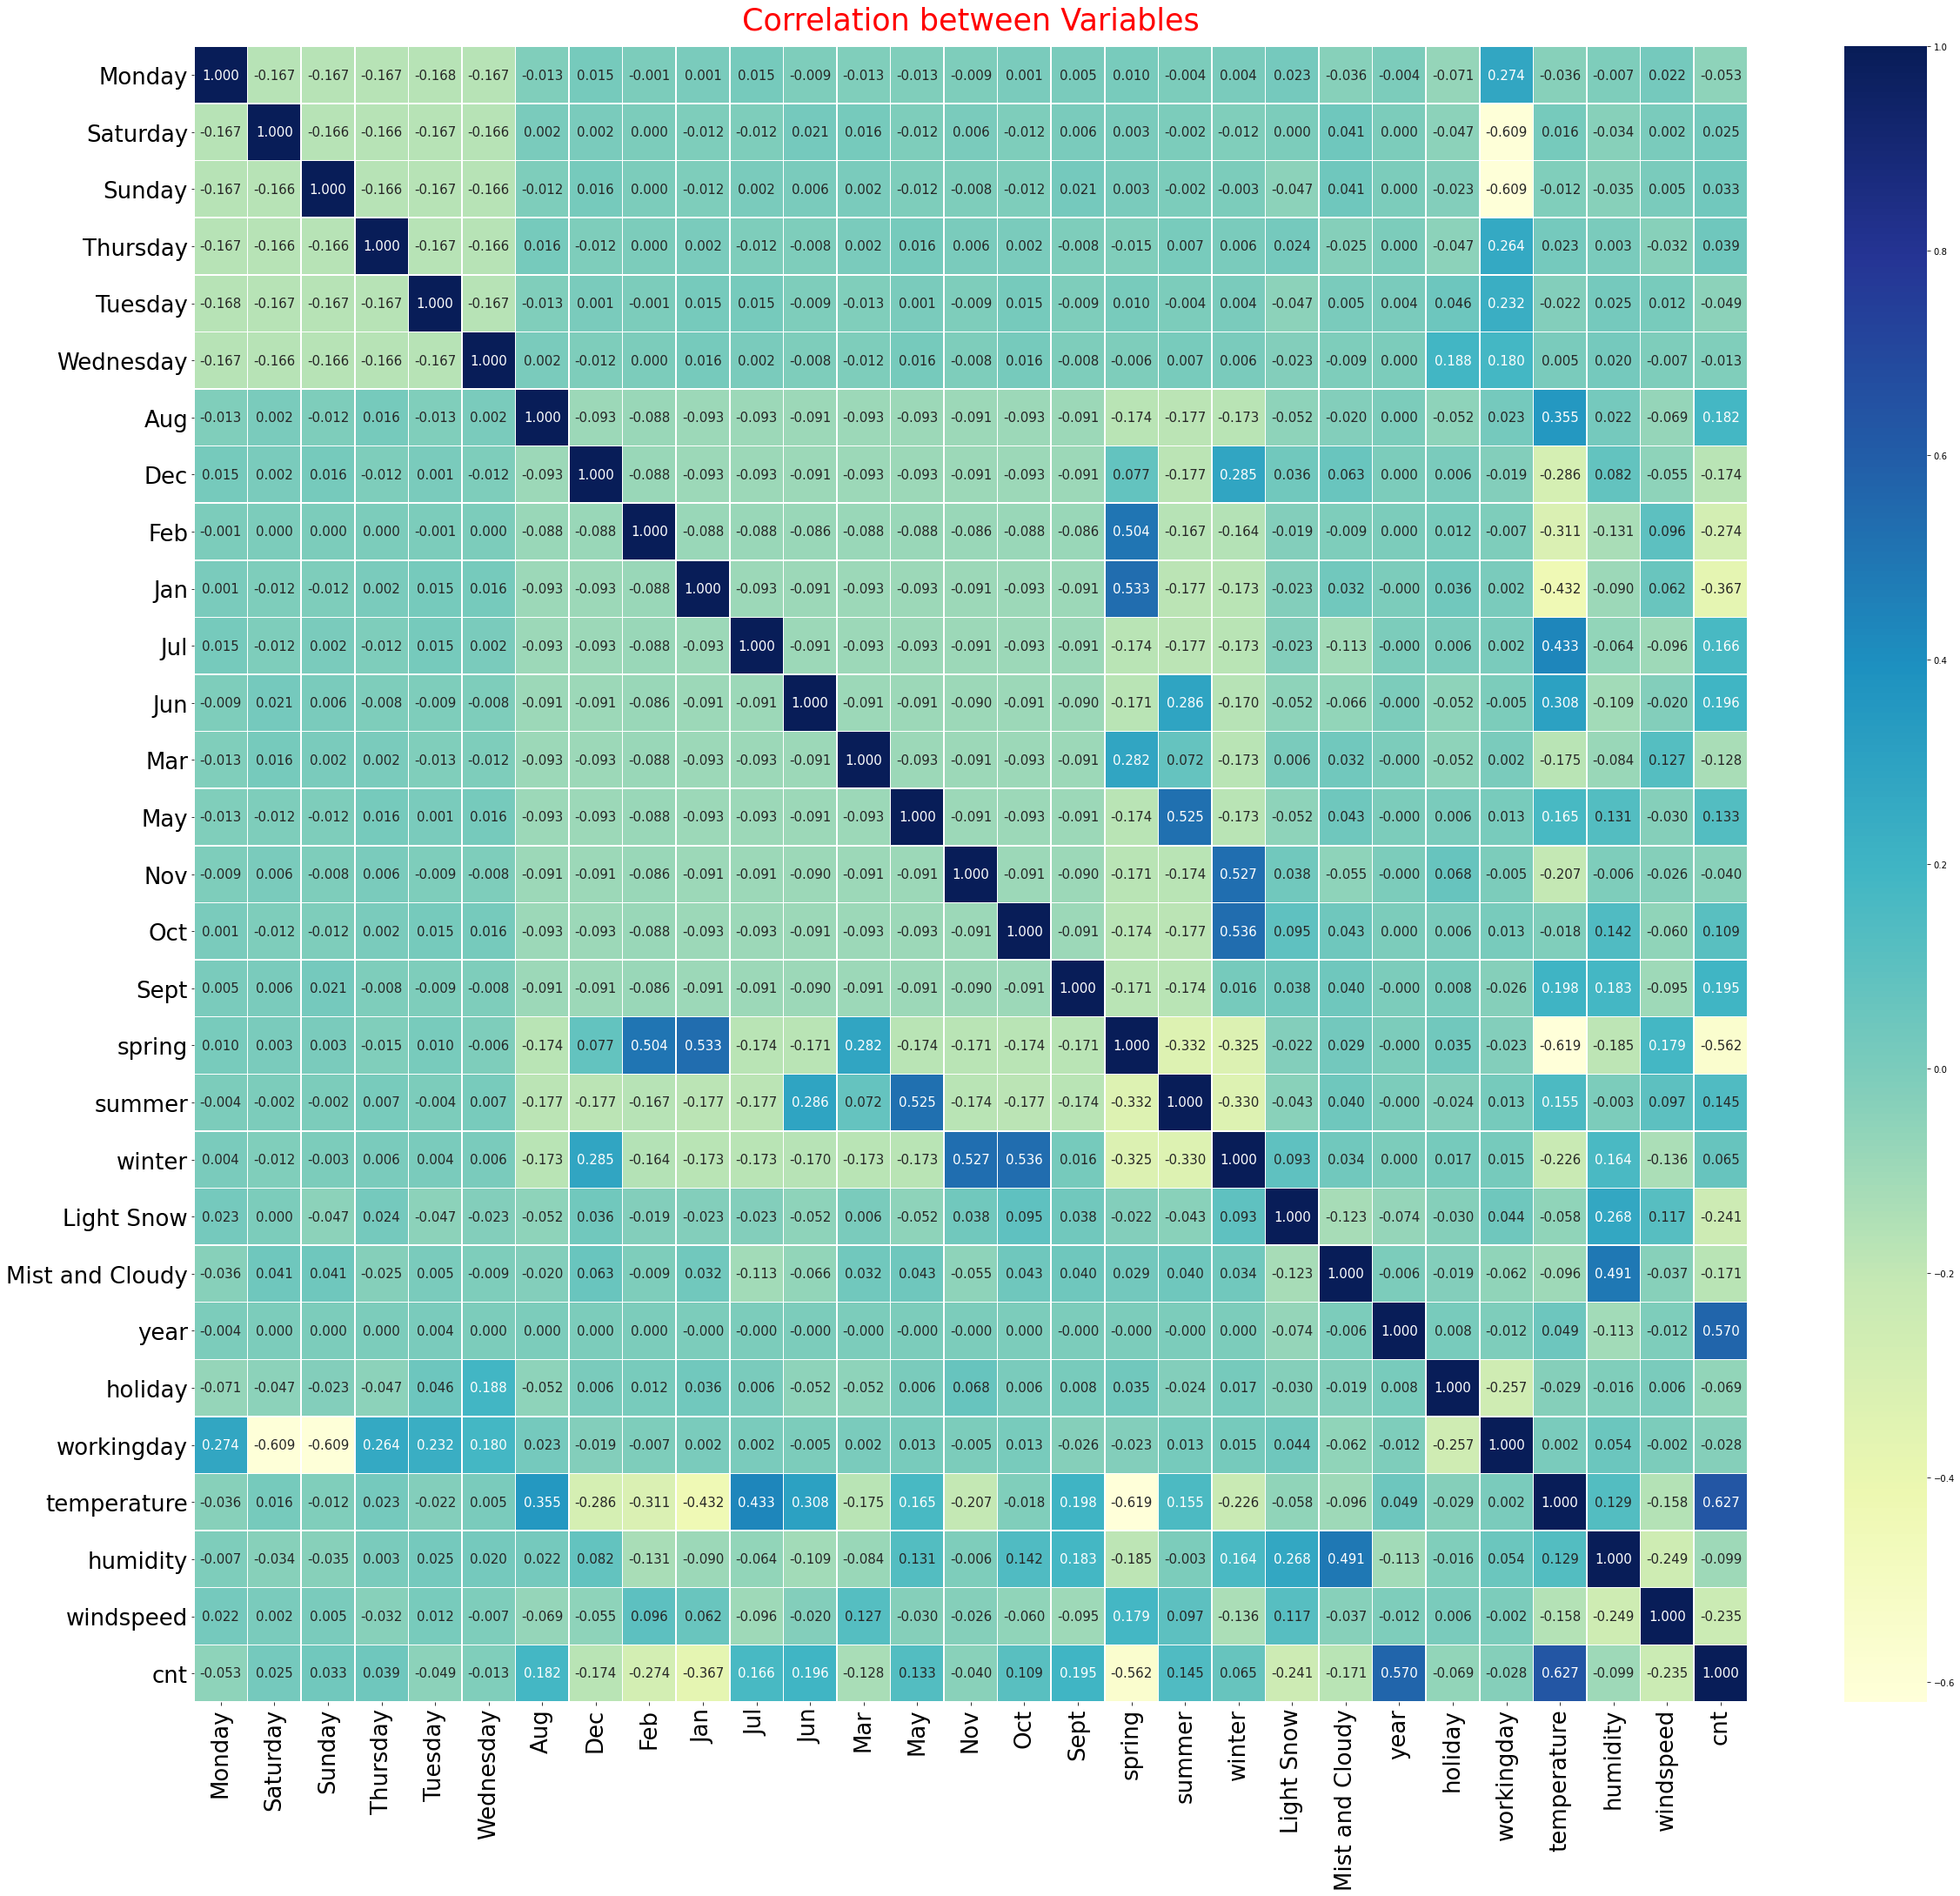

In [256]:
# Now lets check the correlation between numerical variables again using Heatmap

# Setting the figure size

plt.figure(figsize=(40, 35))

# Ploting the heatmap for correlation

sns.heatmap(prep_boom_bike_df.corr(), cmap='YlGnBu', annot = True,linecolor='white',fmt='.3f',linewidths=0.5,annot_kws={"fontsize":15})

# Setting the title of the plot

plt.title("Correlation between Variables", fontsize=35, color='red',pad=20)

# Setting x-ticks font size
    
plt.xticks(fontsize = 26)
    
# Setting y-ticks font size
    
plt.yticks(fontsize = 26)

# Showing the plot

plt.show()

#### Inferrence:

- We can see that the predictor variable `Temperature has a high positive linear realtionship with the count of total rental bikes (Dependent variable 'cnt')`.It has a good correlation with the count that is `0.627`.



- We can see that `Summer season`,`June to october` months are in good correlation with the 'cnt' variable. And seem to have good influence on the number of bike rentals.

#### Divide the dataframe into train and test dataset
- `Use 70% of data` to train dataset
- `Use 30% of data` as test dataset

In [257]:
# Spiting dataframe into train (70%) and test data (30%) for model building using sklearn library train_test_split method

np.random.seed(0)

Boom_bike_df_train,Boom_bike_df_test = train_test_split(prep_boom_bike_df,train_size=0.70,random_state=100)


In [258]:
# Checking the number of rows in train dataset

print(Boom_bike_df_train.shape)


(510, 29)


In [259]:
# Checking the number of rows in test dataset

print(Boom_bike_df_test.shape)

(220, 29)


### Perform scalling on train dataset

- **Formula:** x_scalled = (x - min(x))/(max(x) - min(x))


- Perform **`MinMaxScalling`** to set the data values between 0 (Min) and 1 (Max) on below variables
    - `temperature`
    - `humidity`
    - `windspeed`
    - `cnt`
    
    
- Normalize the values of numeric variables using **`MinMaxScalling`**

In [260]:
# Perform scalling on the continuous variable, here we will use Min Max scaler

# Listing the numerical variable for scalling

#col_scaling=['temperature','humidity','windspeed','cnt']
col_scaling=['temperature','humidity','windspeed']

# Initialize the MinMaxScaler

scaler=MinMaxScaler()

# Scalling the variable using fit_transform

Boom_bike_df_train[col_scaling]=scaler.fit_transform(Boom_bike_df_train[col_scaling])

In [261]:
# Checing the dataset after scalling

Boom_bike_df_train.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,...,winter,Light Snow,Mist and Cloudy,year,holiday,workingday,temperature,humidity,windspeed,cnt
576,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,7216
426,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,4066
728,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.245101,0.498067,0.663106,1796
482,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,4220
111,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.345824,0.751824,0.380981,1683


- We can observe that the min and max values are set to `zero` and `one`.All the other values are in between 0 and 1

#### Dividing into `X and y` sets on train dataset for the model building

In [262]:
# Spliting train data into X_train and y_train variables for model building 

# Popping the cnt column into y_train 

y_train=Boom_bike_df_train.pop('cnt')

# Defining the X_train for rest columns

X_train=Boom_bike_df_train

In [263]:
# checking the rows for y train dataset

y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [264]:
# checking the rows for X train dataset

X_train.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,...,summer,winter,Light Snow,Mist and Cloudy,year,holiday,workingday,temperature,humidity,windspeed
576,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0.345824,0.751824,0.380981


## Data Modelling and Evaluation :

### Building a linear model

##### Create Linear Regression Model using mixed approach

    - Recursive Feature Elimination (RFE) 
    - Manual Approach using p-value and Variance Inflation Factor (VIF)

#### Using Recursive Feature Elimination (RFE)

In [265]:
# Now will do a important feature selection based on RFE (Recursive feature elimination)

# Iinitilize the LinearRegression

lin_mod=LinearRegression()

# Fit X and y into model

lin_mod.fit(X_train,y_train)

# Doing the important feature selection using RFE method

rfe_lin_mod=RFE(lin_mod,15)

rfe_lin_mod=rfe_lin_mod.fit(X_train,y_train)

In [266]:
# Displaying features impotancewise  and it ranking in list format

list(zip(X_train.columns,rfe_lin_mod.support_,rfe_lin_mod.ranking_))

[('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist and Cloudy', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [267]:
# Extracting and Displaying important feature after RFE

col_imp_features=X_train.columns[rfe_lin_mod.support_]

print(col_imp_features)

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sept', 'spring', 'summer', 'winter',
       'Light Snow', 'Mist and Cloudy', 'year', 'holiday', 'temperature',
       'humidity', 'windspeed'],
      dtype='object')


In [268]:
# Extracting and Displaying less important feature after RFE

col_less_imp_features=X_train.columns[~ rfe_lin_mod.support_]

print(col_less_imp_features)

Index(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'workingday'],
      dtype='object')


In [269]:
# creating the new X_train dataframe with important features

X_train_model=X_train[col_imp_features]


### Building the Linear model using Statsmodels

In [270]:
# creating custom function model_build_lm for Building linear regression model based on important predictor variables

def model_build_lm(lm_model_df):

  # Adding constant for intercept data beacuse we are using stats model library for model building

  X_train_model_lm=sm.add_constant(lm_model_df)

  # Building and fitting the model for train dataset

  lr=sm.OLS(y_train,X_train_model_lm).fit()

  # Returing the linear built model object

  return (lr)

#### Model 1:

In [271]:
# Calling the custom function model_build_lm for model building with X_train df and displaying the statistical summary

lr_model=model_build_lm(X_train_model)

# Displaying the statistical summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          8.15e-189
Time:                        18:17:33   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2800.5481    313.638     

### Multicollinear predictor variables will be dropped based on VIF values
   - **Variance Inflation Factor,** 
       $ VIF_i = \frac{1}{1 - {R_i}^2} $
       - `VIF > 10`, should be dropped
       - `VIF between 5 to 10`, should be evaluated
       - `VIF < 5`, is safe to consider
       
### Insignificant Predictor variables will be dropped based on p- values
   - `p-value > 0.05`, should be dropped
   - `p-value < 0.05`, is safe to consider
   
### Perform manual Approach to drop multicollinear and insignifient Predictor variables
- Drop the independent variables basd on p-value and VIF



In [272]:
# Creating custom function cal_VIF for calculating VIF (Variance inflation factor) to check the multicollinearity

def cal_VIF (model_df):

  # Creating a dataframe

  VIF_df=pd.DataFrame()

  # Creating the new column and populating it by column variables

  VIF_df['features']=model_df.columns

  # Calculating the VIF and inserting the data for the same

  VIF_df['VIF']=[variance_inflation_factor(model_df.values,i) for i in range(model_df.shape[1])]

  # Rounding the VIF columns upto 2 deciaml place

  VIF_df['VIF']=VIF_df['VIF'].round(decimals=2)

  # Soring the VIF values in descending order

  VIF_df.sort_values(by='VIF',ascending=False,inplace=True)

  # Returnong the dataframe

  return (VIF_df)

In [273]:
# Calling the custom function cal_VIF for calculating the VIF and Checking its values

VIF_cal_df=cal_VIF(X_train_model)

# Displaying the VIF_cal_df dataframe

VIF_cal_df

,features,VIF
13,humidity,30.89
12,temperature,17.79
14,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
9,Mist and Cloudy,2.32
10,year,2.09
3,Nov,1.85
1,Jan,1.75


#### Inference: 

- From the above `Model 1` summary,  **`dropping column 'december'`** (predictor variable) due to `high p -value` , making the variable insignificant as regression coefficient



In [274]:
# dropping columns december due to high p -value and low VIF , making the column insignificant

X_train_model.drop(columns=['Dec'],inplace=True)

#### Model 2:

In [275]:
# Calling the custom function model_build_lm for model building with X_train df after dropping (Dec columns) and displaying the statistical summary

lr_model=model_build_lm(X_train_model)

# displaying the statistical summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          4.41e-189
Time:                        18:17:33   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2657.8086    306.565     

In [276]:
# Calling the custom function cal_VIF for calculating the VIF and Checking its values

VIF_cal_df=cal_VIF(X_train_model)

# Displaying the VIF

VIF_cal_df

,features,VIF
12,humidity,29.09
11,temperature,16.80
13,windspeed,4.72
4,spring,4.37
6,winter,3.78
5,summer,2.80
8,Mist and Cloudy,2.29
9,year,2.09
0,Jan,1.67
2,Nov,1.60


#### Inference: 

- From the above `Model 2` summary **`dropping column 'November'`** (predictor variable) due to `high p -value` , making the variable insignificant as regression coefficient

In [277]:
# dropping columns November due to high p -value and low VIF , making the column insignificant

X_train_model.drop(columns=['Nov'],inplace=True)

#### Model 3:

In [278]:
# Calling the custom function model_build_lm for model building with X_train df after dropping (Nov columns) and displaying the statistical summary

lr_model=model_build_lm(X_train_model)

#displaying the statistical summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          7.59e-190
Time:                        18:17:33   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2598.4103    303.711     

In [279]:
# Calling the custom function cal_VIF for calculating the VIF and Checking its values

VIF_cal_df=cal_VIF(X_train_model)

# Displaying the VIF

VIF_cal_df

,features,VIF
11,humidity,29.02
10,temperature,16.71
12,windspeed,4.66
3,spring,4.34
5,winter,3.36
4,summer,2.79
7,Mist and Cloudy,2.29
8,year,2.09
0,Jan,1.67
1,Jul,1.59


#### Inference :

- From the above `Model 3` summary **`dropping column 'January'`** (predictor variable) due to `high p -value` , making the variable insignificant as regression coefficient

In [280]:
# dropping columns Jan due to high p -value and low VIF , making the column insignificant

X_train_model.drop(columns=['Jan'],inplace=True)

#### Model 4:

In [281]:
# Calling the custom function model_build_lm for model building with X_train df after dropping (Jan columns) and displaying the statistical summary

lr_model=model_build_lm(X_train_model)

# displaying the statistical summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.95e-190
Time:                        18:17:33   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2497.0845    299.726     

In [282]:
# Calling the custom function cal_VIF for calculating the VIF and Checking its values

VIF_cal_df=cal_VIF(X_train_model)

# Displaying th VIF

VIF_cal_df


,features,VIF
10,humidity,28.03
9,temperature,16.03
11,windspeed,4.65
2,spring,4.01
4,winter,3.33
3,summer,2.79
6,Mist and Cloudy,2.28
7,year,2.08
0,Jul,1.58
1,Sept,1.38


#### Inference :

- From the above `Model 4` summary **`dropping column 'humidity'`** (predictor variable) due to `high VIF , making the variable muticollinear on the other predictor variable`.The model should be independent of multicollinearity.



In [283]:
# dropping columns humidity due to high VIF , making the column multicolliear and insignificant

X_train_model.drop(columns=['humidity'],inplace=True)

#### Model 5:

In [284]:
# Calling the custom function model_build_lm for model building with X_train df after dropping (humidity columns) and displaying the statistical summary

lr_model=model_build_lm(X_train_model)

# displaying the statistical summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          5.06e-187
Time:                        18:17:33   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1755.4766    256.961     

In [285]:
# Calling the custom function cal_VIF for calculating the VIF and Checking its values

VIF_cal_df=cal_VIF(X_train_model)

# Displaying the VIF values

VIF_cal_df

,features,VIF
9,temperature,5.09
10,windspeed,4.60
3,summer,2.23
2,spring,2.08
7,year,2.07
4,winter,1.78
0,Jul,1.58
6,Mist and Cloudy,1.55
1,Sept,1.34
5,Light Snow,1.08


#### Inference:

- From the above `Model 5` summary **`dropping column 'July' (predictor variable)`** due to `high p -value` , making the variable insignificant as regression coefficient.

In [286]:
# dropping columns Jul due to high p -value and low VIF , making the column insignificant

X_train_model.drop(columns=['Jul'],inplace=True)

#### Model 6:

In [287]:
# Calling the custom function for model building with X_train df after dropping (Jul columns) and displaying the statistical summary

lr_model=model_build_lm(X_train_model)

# displaying the statistical summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.47e-186
Time:                        18:17:33   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1680.9085    257.298     

In [288]:
# Calling the custom function cal_VIF for calculating the VIF and Checking its values

VIF_cal_df=cal_VIF(X_train_model)

# Displaying the VIF

VIF_cal_df

,features,VIF
9,windspeed,4.60
8,temperature,3.84
6,year,2.07
1,spring,1.99
2,summer,1.90
3,winter,1.63
5,Mist and Cloudy,1.55
0,Sept,1.23
4,Light Snow,1.08
7,holiday,1.04


#### Inference:

- From the above `Linear Regression Model summary`, we can see that the **p-value** for all the predictor variables/regression coefficient are within the acceptable range, which mean that **all the Predictor variables are `Significant in nature`**. 


- The above DataFrame also shows that, **VIF value** of all the features are **< 5**, i.e. within safe limit to consider. Which mean that **predictor variables are not having `multicollinearity` among each-other**.


- The `Linear Regression Model summary` is showing the value of **R-square** as **83.3 %** and the value of **Adjusted R-square** as **82.9 %**, which mean the **model is able to explain 83.3 % of its variance** which is good.


- The `Linear Regression Model summary` also shows that the **F-statistic** is **248.4**, which makes the **probability of F-statistic very low (~0)**, which indicates a `model is significant`.


- **From all the above observations, we have consider this model as our `Final Model`**.

## Saving the model

In [289]:
joblib.dump(lr_model,"D:\Data Science\Machine Learning model\Linear Regression\Boom_Bike_Linear_regression_Assignment_Sagnik\Boom_bike_lr_model.pkl")

['D:\\Data Science\\Machine Learning model\\Linear Regression\\Boom_Bike_Linear_regression_Assignment_Sagnik\\Boom_bike_lr_model.pkl']

## Saving scalling file

In [290]:
joblib.dump(scaler,"D:\Data Science\Machine Learning model\Linear Regression\Boom_Bike_Linear_regression_Assignment_Sagnik\Boom_bike_scaling.pkl")

['D:\\Data Science\\Machine Learning model\\Linear Regression\\Boom_Bike_Linear_regression_Assignment_Sagnik\\Boom_bike_scaling.pkl']

#### Calculating the y predicted (cnt) values based on X train dataset for predictor variables

In [291]:
# Calculating the y_train pred variable from the predictive model

# Adding constant for intercept values 

X_train_model_lin_model=sm.add_constant(X_train_model)

# Predicting the y values from X_trian data 

y_train_pred=lr_model.predict(X_train_model_lin_model)


In [292]:
# Checking the first 10 rows of y train predict

y_train_pred.head(10)

576    6760.237298
426    4058.314918
728    3398.575571
482    4971.514233
111    2481.665189
580    6919.483793
500    7021.873708
479    6204.296078
472    5314.955763
455    5108.871293
dtype: float64

In [293]:
X_train_model_lin_model.head(10)

,const,Sept,spring,summer,winter,Light Snow,Mist and Cloudy,year,holiday,temperature,windspeed
576,1.0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,1,0,0,0,1,1,0,0.442393,0.255342
728,1.0,0,1,0,0,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,0,1,1,0,0.395666,0.188475
111,1.0,0,0,1,0,0,1,0,0,0.345824,0.380981
580,1.0,0,0,0,0,0,0,1,0,0.914852,0.462538
500,1.0,0,0,1,0,0,0,1,0,0.719639,0.172431
479,1.0,0,0,1,0,0,0,1,0,0.520271,0.164434
472,1.0,0,0,1,0,0,1,1,0,0.503656,0.270032
455,1.0,0,0,1,0,0,1,1,0,0.456929,0.279394


### Residual Analysis :

`Check Various Assumptions` of Linear Regression

- **Normality**: Error terms should `distributed normally` with `zero mean`.
- **Homoscedasticity**: The `variance of error terms should be constant`. 
- **Independence**: Error Terms are `independent of each other`.

In [294]:
y_train.head(10)

576    7216
426    4066
728    1796
482    4220
111    1683
580    6824
500    7424
479    6196
472    4367
455    6041
Name: cnt, dtype: int64

In [295]:
# Calculating the Residual for the model 

residual=y_train-y_train_pred


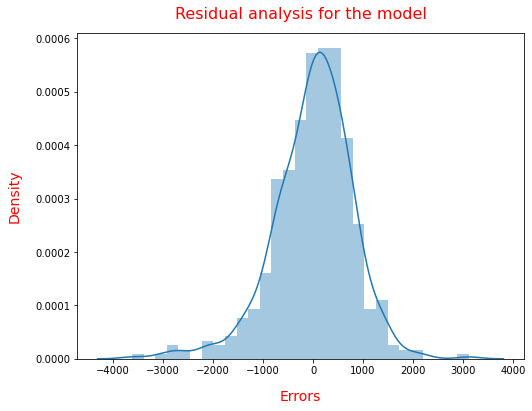

In [296]:
# Checking whether the residual are normally distributed or not with mean 0.0

# Setting the figure size

plt.figure(figsize=(8,6))

# Ploting distribution plot

sns.distplot(residual)

# Formating the distplot

plt.title("Residual analysis for the model",fontsize=16,color='red',pad=14)
plt.ylabel('Density', fontsize = 14,labelpad=14,color='red') 
plt.xlabel('Errors', fontsize = 14,labelpad=14,color='red') 

# Displaying the plot

plt.show()

#### Inference:

- From the above `distribution plot` we can see that the **`error terms are normally distributed`** with `mean 0`.This is one of the assumption for linear regression, which is true in our case.

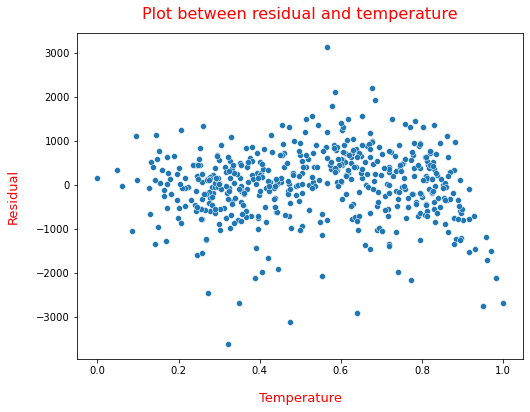

In [297]:
# Ploting the residual with respect to one predictor variable (X) temperature to see the variance is constant or not (homoscedastisity)

# Setting the figure size

plt.figure(figsize=(8,6))

# Ploting the scatterplot 

sns.scatterplot(X_train_model['temperature'],residual)

# Setting the format of the plot

plt.title('Plot between residual and temperature', fontsize=16,color='red',pad=14)             
plt.xlabel('Temperature', fontsize=13,color='red',labelpad=16)                          
plt.ylabel('Residual', fontsize=13,color='red',labelpad=16)       

# Displaying the plot

plt.show()

#### Inference:

- From the above `scatter plot` we can see that the **`error terms are independent of each other`**, `no such pattern is there within residuals`.This is one of the assumption for linear regression, which is true in our case.


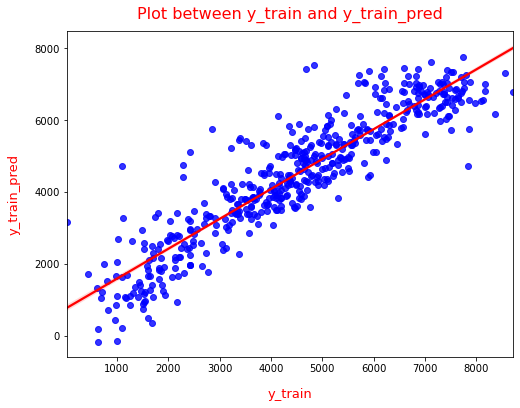

In [298]:
# Plotting y_train and y_train_pred to understand the spread during training the dataset.

# Setting the figure size

plt.figure(figsize=(8,6))

#Ploting the regression plot

sns.regplot(y_train,y_train_pred,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot

plt.title('Plot between y_train and y_train_pred', fontsize=16,color='red',pad=12)             
plt.xlabel('y_train', fontsize=13,color='red',labelpad=14)                          
plt.ylabel('y_train_pred', fontsize=13,color='red',labelpad=14)       

# Displaying the plot

plt.show()

In [299]:
# calculating mean suqared error of the final predicted model

mse_lin_model=mean_squared_error(y_train,y_train_pred)

# Displaying the mean squared error

print(mse_lin_model)

635316.8952187913


In [300]:
# Calculating the RMSE (root mean squared error) of the final predicted model

RMSE=np.sqrt(mse_lin_model)

# Displaying the root mean squared error

print(RMSE)

797.0676854689264


#### Inference :

- The above regression plot between **y_train** and **y_train_pred** are `equally distributed along the regression line`. Hence, the variance is constant.


- Hence, the **assumption of equal variance/ Homoscedasticity becomes true** for our model.

## Model Evaluation :
    
- **Predicting test dataset from trained model**

     - Perform `MinMax scalling`
     - `Divide X and y sets` on test dataset
     - `Drop feature columns` which are not part of final model
     - `Calculating y_test_pred from trained linear regression` model fit 

#### MinMax scalling on test dataset

In [301]:
# Perform scalling on the continuous variable for test dataset, here we will use Min Max scaler tranform

# Listing the numerical variables for scalling

#col_scaling_test=['temperature','humidity','windspeed','cnt']

col_scaling_test=['temperature','humidity','windspeed']

# Only transforming the test data based on what model has learn from train data

Boom_bike_df_test[col_scaling_test]=scaler.transform(Boom_bike_df_test[col_scaling_test])

In [302]:
# Checking the test dataset after scalling

Boom_bike_df_test.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,...,winter,Light Snow,Mist and Cloudy,year,holiday,workingday,temperature,humidity,windspeed,cnt
184,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,6043
535,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0.901354,0.610133,0.153728,6211
299,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0.511964,0.837699,0.334206,2659
221,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,4780
152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.817246,0.314298,0.537414,4968


#### Splitting dataset in to X and y test dataset

In [303]:
# Spliting test data into X and y variables for model building 

# popping the cnt into y test

y_test=Boom_bike_df_test.pop('cnt')

# defning the X test for rest variables

X_test=Boom_bike_df_test

In [304]:
# checking the rows for y test data

y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [305]:
# checking the rows for x test data

X_test.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,...,summer,winter,Light Snow,Mist and Cloudy,year,holiday,workingday,temperature,humidity,windspeed
184,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0.831783,0.657364,0.084219
535,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0.511964,0.837699,0.334206
221,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.817246,0.314298,0.537414


#### Analyze the same features on which model is trained earlier

In [306]:
# creating the new X_test_lm dataframe with important features and with remaiming variables that we have done during training the model

# Lisitng the predictor columns from X train dataset

cols_imp_features=X_train_model.columns

# Defining the X_test_lm with important feature

X_test_lm=X_test[cols_imp_features]


In [307]:
# Checking the X_test_lm data 

X_test_lm.head()

,Sept,spring,summer,winter,Light Snow,Mist and Cloudy,year,holiday,temperature,windspeed
184,0,0,0,0,0,1,0,1,0.831783,0.084219
535,0,0,1,0,0,0,1,0,0.901354,0.153728
299,0,0,0,1,0,1,0,0,0.511964,0.334206
221,0,0,0,0,0,0,0,0,0.881625,0.339570
152,0,0,1,0,0,0,0,0,0.817246,0.537414


#### Predict the values of y (cnt) based on rest of the predictor variables

In [308]:
# Calculating the y_train pred variable from the above model

# Adding constant for intercept values 

X_test_model_lin=sm.add_constant(X_test_lm)

# Predicting the y predict values for test dataset

y_test_pred=lr_model.predict(X_test_model_lin)

In [309]:
# Checking the y_test pred data 

y_test_pred.head(10)

184    3504.872086
535    7800.519196
299    3513.392980
221    4904.728463
152    4922.279900
404    3879.701862
198    4758.222851
171    3857.090502
512    6372.259038
200    5152.563166
dtype: float64

### Calculating Model parameters on test dataset

- `R-squared` 
- `Adjusted R-Squared`
- `Mean squared error` (MSE)
- `Root Mean squared error` (RMSE)

In [310]:
# calculating r2score of the final predicted model on test data

# using r2_score method for calculating r2score of the model

r2Score=r2_score(y_test,y_test_pred)

# Printing the r2score

print(r2Score)

0.8038195990728842


#### Inference:

- We have got the `R-square value as 0.8038 or 80.38%`, which means the predited model is able to `explain the 80.38% of its variance`.Which is a good r2score.

In [311]:
# Calculating Adjusted r2 of the predicted model,n=sample size, k = number of predictor variables

#Fetching the number of rows

n=X_test_lm.shape[0]

#Fetching the number of number of predictor variables

k=X_test_lm.shape[1]

#Calculating the adjusted r2score of the model

Aadjusted_r2=1-(((1-r2Score)*(n-1))/(n-k-1))

# Printing the adjusted r2score

print(Aadjusted_r2)

0.7944329770189553


#### Inference:

- We have got the `adjusted R-square value as 0.7944 or 79.44%`, for the predited model which is good.

In [312]:
# calculating mean suqared error of the final predicted model

mse_lin_model=mean_squared_error(y_test,y_test_pred)

# Displaying the mean squared error

print(mse_lin_model)

708684.0672882558


#### Inference:

 - We have got the `Mean square error value as 0.00938` , the `low value of MSE means the predicted model is good`.


In [313]:
# Calculating the RMSE (root mean squared error) of the final predicted model

RMSE=np.sqrt(mse_lin_model)

# Displaying the root mean squared error

print(RMSE)

841.8337527613488


#### Inference:

- We have got the adjusted `Root mean square error value as 0.0968` , the `low value of RMSE means the predicted model is good`.


## Final Result Comparison between Train and Test Model: 


**R-Square Value:**


  - The value of `R-Squared in train model` is **83.3%**
  - The calculated value of `R-Squared in test predicted model` is **80.38%**
  - **Difference in R-Squared** between **train** and **test** model is **2.92%**, which is `within 5 % range`.

  

**Adjusted R-Square Value:**


  - The value of `Adjusted R-Squared in train model` is **82.9%**
  - The calculated value of `Adjusted R-Squared in test predicted model` is **79.44%**
  - **Difference in Adjusted R-Squared** between **train** and **test** model is **3.26 %**, which is `within 5 % range`.
  
  
  
As we consider that, if **`R-Square and Adjusted R-Square value of test model lies with in ±5% confidnce level of R-Square and Adjusted R-Square of train model`**, then the model is a good model.


Our model seems to be a good model that can very well **`'Generalize'`** various datasets.

### Visualizing the Best  fit Line on the test predicted set

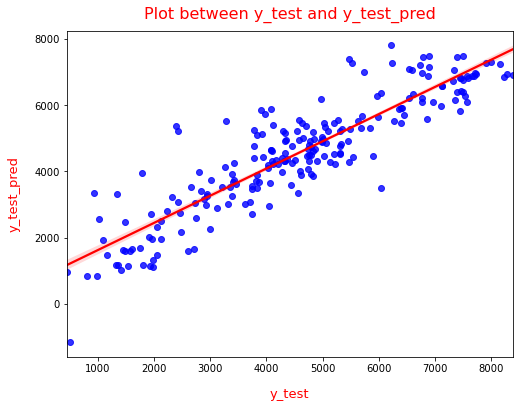

In [314]:
# Plotting y_test and y_pred to understand the spread after predictive modelling.

# Setting the figure size

plt.figure(figsize=(8,6))

# Plotting the regression plot 

sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot

plt.title('Plot between y_test and y_test_pred', fontsize=16,color='red',pad=12)             
plt.xlabel('y_test', fontsize=13,color='red',labelpad=14)                          
plt.ylabel('y_test_pred', fontsize=13,color='red',labelpad=14)       

# Displaying the plot

plt.show()

#### Inferense:

- The above regression plot between `y_test and y_test_pred` shows that the predicted values are hugging the regression line , hence got the best fit line.

- Hence, our linear model will able to **predict** the output based on unknown dataset.

### We can see that the equation of our best fitted line for the Linear Regression Model:

$cnt=1680.9085 + 4152.4862×temperature+790.9513×Sept+539.5655×summer+821.1889×winter+2035.0738×year-2477.4933×Light  Snow-684.4142×Mist and Cloudy-481.5900×spring-837.1794×holiday-1287.2679×windspeed$

## Predicted model interpretation :



**Positive relationship :**


- We can cee the ('cnt' dependent variable) demand of rental bikes is very much dependent on the `temperature` that is `one unit rise in temperature,  increases the count of the rental bikes by 0.4777 units keeping all other feature constant`.


- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `September` month , that is `on september the count of the rental bikes increased by 0.0910 units keeping all other feature constant`.



- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `Summer season` , that is on `summer the count of the rental bikes increased by 0.0621 units keeping all other feature constant`.



- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `Winter season` as well , that is `on winter the count of the rental bikes increased by 0.0945 units keeping all other feature constant`.


- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the years, that is `every year the demand of the rental bikes has increased by 0.2341 unit keeping all other feature constant`.




**Negative relationship :**


- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `Light and Snow weather` , that is on `Light and Snow wheather situaton the demand of the rental bikes has decreased by 0.2850 unit keeping all other feature constant`.



- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the` Mist and Cloudy weather` , that is on `Mist and Cloudy wheather situaton the demand of the rental bikes has decreased by 0.0787 unit keeping all other feature constant`.



- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `Spring season` , that is on `spring the count of the rental bikes decreased by 0.0554 units keeping all other feature constant`.



- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `holidays` , that is `on holidays the demand of the rental bikes decreased by 0.0963 units keeping all other feature constant`.



- We can cee the ('cnt' dependent variable) demand of rental bikes is dependent on the `windspeed` , that is `one unit increase of windspeed the demand of the rental bikes decreased by 0.1481 units keeping all other feature constant`.

## Business interpretation:

-  A US bike-sharing provider BoomBikes can focus more on Temperature, `increase in temperature will increase the demand of bikes`.



-  We can see demand for bikes was more in 2019 than 2018, `As there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic` and by the time Corona Virus reduces the things will be better.Business should do a better marketing and if more people comes to know about boom bikes then every year the demand will increase more and more.



- Business should focus more  on `Summer and  Winter season` they have good influence on bike rentals.



- Demand is also high in the `month of September`, so business can focus on this month.



- We can see `Spring season has negative coefficients and negatively correlated to bike rentals`. So  Business can give some `offers/Discounts` to increase the demand.




-  Now seeing to `weathersit variable, we have got negative coefficients for Mist  and cloudy , Light snow weather`, Business can give some `offers/Discounts` to increase the demand.


- Now seeing to `holiday variable, we have got negative coefficients for holidays`, Business can give some `offers/Discounts or special Packages` to increase the demand.